In [1]:
# Import required libraries
import numpy as np
import pandas as pd
from tpot import TPOTClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import datetime
import math
from pathlib import Path

In [2]:
# Load the data
HRV = pd.read_csv('/Users/aguetat/Desktop/F013C350104F.csv')
HRV.head(10)

,date,timestamp,HRV,heartrate,heartrate_diff,median_1,median_2,median_3,mean_1,mean_2,mean_3,sd_dev_1,sd_dev_2,sd_dev_3
0,20200211172244,1.11,0.00,110.61,-38.61,107.492958,91.304348,107.492958,102.877087,91.304348,102.877087,26.208,27.30,26.21
1,20200211172244,1.94,0.83,72.00,-3.24,107.492958,70.378378,107.492958,102.877087,70.378378,102.840617,26.208,2.29,26.26
2,20200211172244,2.81,0.87,68.76,22.10,107.492958,79.806950,107.492958,102.877087,79.806950,102.986781,26.208,15.63,26.24
3,20200211172244,3.47,0.66,90.86,-28.81,107.492958,76.452962,107.492958,102.877087,76.452962,103.149781,26.208,20.37,26.20
4,20200211172244,4.44,0.97,62.05,2.63,107.492958,63.363373,107.492958,102.877087,63.363373,103.208597,26.208,1.86,26.24
5,20200211172244,5.37,0.93,64.68,-10.16,107.492958,59.596126,107.492958,102.877087,59.596126,103.406481,26.208,7.19,26.15
6,20200211172244,6.47,1.10,54.51,-6.81,107.492958,51.107143,107.492958,102.877087,51.107143,103.593575,26.208,4.82,26.07
7,20200211172244,7.73,1.26,47.70,5.67,107.492958,50.535315,108.260765,102.877087,50.535315,103.831824,26.208,4.01,25.91
8,20200211172244,8.85,1.12,53.37,-2.49,107.492958,52.125315,109.028571,102.877087,52.125315,104.105638,26.208,1.76,25.67
9,20200211172244,10.03,1.18,50.88,17.26,107.492958,59.511429,109.028571,102.877087,59.511429,104.354339,26.208,12.21,25.49


/Users/aguetat/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left == right == 20200211172244.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


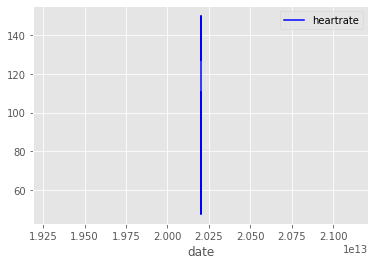

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use("ggplot")

HRV.plot(x='date', y='heartrate', color="blue")

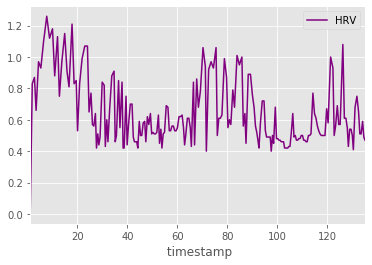

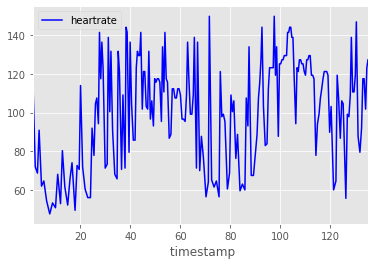

In [4]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use("ggplot")
HRV_data = HRV.plot(x=' timestamp', y='HRV', color="purple")
HR_data = HRV.plot(x=' timestamp', y='heartrate', color="blue")

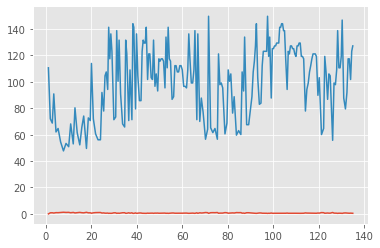

In [5]:
x = HRV[' timestamp']
y1 = HRV['HRV']
y2 = HRV['heartrate']
plt.plot(x, y1, x, y2)
plt.show()

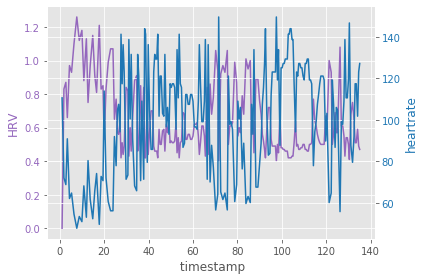

In [6]:
fig, ax1 = plt.subplots()

color = 'tab:purple'
ax1.set_xlabel(' timestamp')
ax1.set_ylabel('HRV', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('heartrate', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()